In [31]:
import gym
import seagul.envs
import pickle
import torch.utils.data

from seagul.rl.run_utils import load_model, load_workspace
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
from seagul.rl.models import PPOModel, SwitchedPPOModel, SwitchedPPOModelActHold
from seagul.nn import MLP
#torch.set_default_dtype(torch.double)
from mpl_toolkits.mplot3d import Axes3D

dtype = np.float32


#seeds = [1]; load_paths =  ['./data2/drake_double/dynamic_step' + str(seed) for seed in seeds]
#load_paths =  ['./data2/sac/asdasdasd']
load_paths = ['./data/seagul/linear11']
env_name = 'linear_z-v0'
#seeds = [0]; load_paths = ['./data/drake_acro_final/warm_seed' + str(seed) for seed in seeds]
model, env, args, ws = load_workspace(load_paths[0])
#num_steps = ws['num_epochs']
#num_steps = 1000



seagul.rl.run_utils
seagul.rl.run_utils


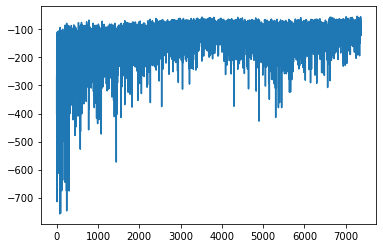

In [15]:
plt.plot(ws['raw_rew_hist'])

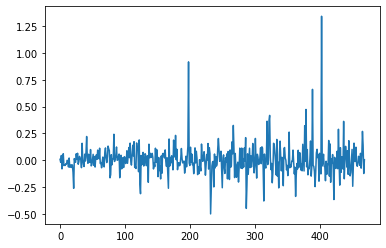

In [16]:
plt.plot(ws['pol_loss_hist'])

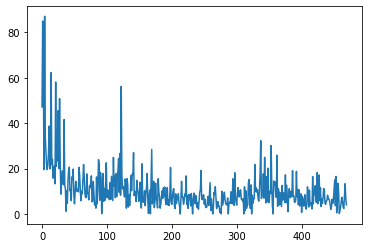

In [17]:
plt.plot(ws['val_loss_hist'])

In [9]:
torch.save(model.value_fn, open('ppo2_warm_val','wb'))
torch.save(model.policy, open('ppo2_warm_pol','wb'))

In [104]:
#model.value_fn.state_dict()

In [26]:
env = gym.make(env_name)
#env._max_episode_steps = 100000
#env.state_noise_max = 5.0
obs = env.reset()
obs = np.array(obs, dtype=dtype)

action_hist = []
m_act_hist = []
obs_hist = []
reward_hist = []

done = False
while not done:
    # for some algorithms you can get the sample mean out, need to change the value on the index to match your env for now
    # mean_actions = out_dict['behaviour_logits'][:17]
    # actions = trainer.compute_action(obs.flatten())
    
    sampled_actions, val, _, logp = model.step(obs)
    actions = sampled_actions
    #actions = np.zeros(3)
    #actions[0] = -obs[1]
   
    #s = 10; b = 8/3; r = 28
    #actions = np.zeros(3)
    #actions[0] = s * (obs[1] - obs[0]) + obs[0]
    #actions[1] = (r * obs[0] - obs[1] - obs[0] * obs[2]) + obs[1]
    #actions[2] = (obs[0] * obs[1] - b * obs[2]) + obs[2]
    
    obs, reward, done, _ = env.step(np.asarray(actions))
    obs = np.array(obs, dtype=dtype)
    
    # !! uncomment to render
    #env.render()
    
    action_hist.append(np.copy(actions))
    obs_hist.append(np.copy(obs))
    reward_hist.append(np.copy(reward))


    
print(sum(reward_hist))
print(len(obs_hist))

action_hist = np.stack(action_hist)
obs_hist = np.stack(obs_hist)
reward_hist = np.stack(reward_hist)

#plt.plot(action_hist)
#plt.figure()
#plt.figure()
#plt.plot(obs_hist)
#plt.figure()

-80.0
86


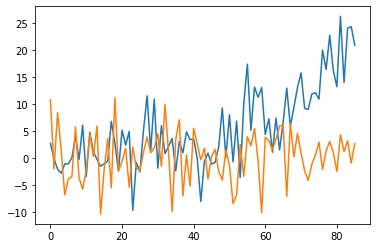

In [27]:
plt.plot(action_hist)

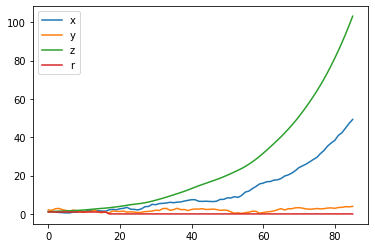

In [32]:
plt.plot(obs_hist)
plt.legend(['x', 'y', 'z', 'r'])

Text(0.5, 0.92, 'phase diagram')

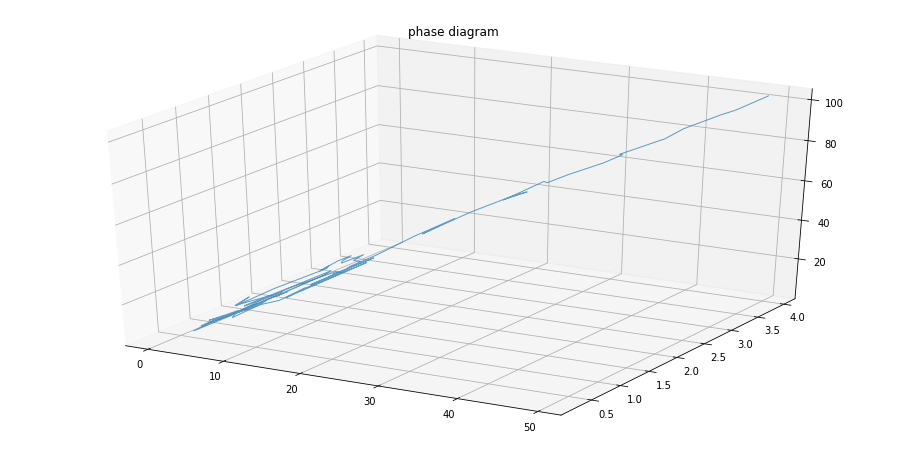

In [33]:
obs_arr = np.stack(obs_hist)

x = obs_arr[:,0]; y = obs_arr[:,1]; z = obs_arr[:,2]

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')
ax.plot(x,y,z, alpha=0.7, linewidth=1)
ax.set_title('phase diagram')


total 0.315077543258667
[-194.75271999]


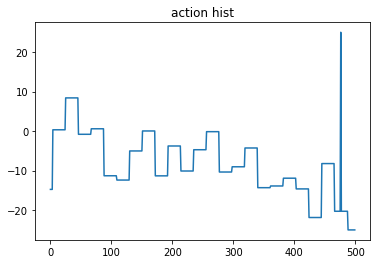

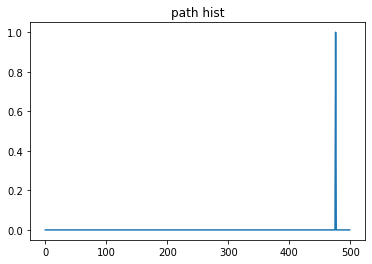

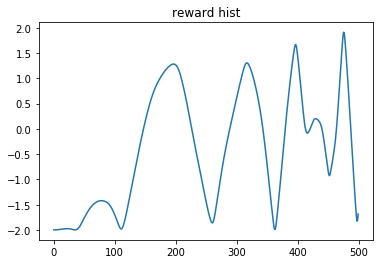

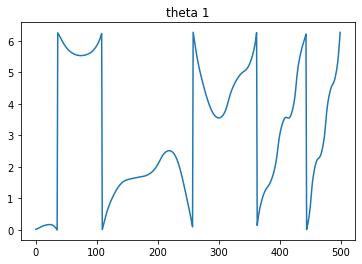

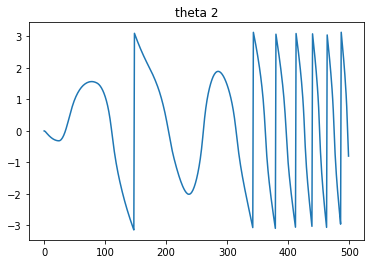

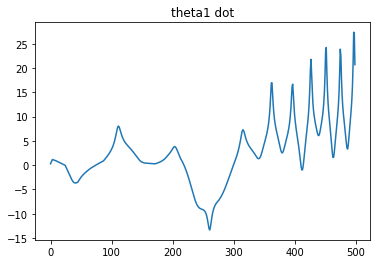

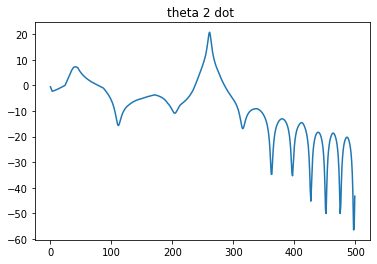

In [198]:
env = gym.make('su_acro_drake-v0')

env.num_steps = 500

def control(q):
    k =  np.array([1316.85, 555.42, 570.33, 272.58])
    #k = np.array([[278.44223126, 112.29125985, 119.72457377,  56.82824017]])
    #k = np.array([[10.44, 3.561, 2.778, 1.301]])
    #k = 
    #import ipdb; ipdb.set_trace()
    gs = np.array([pi,0,0,0])
    #return 0
    return -k.dot(gs - q)

action_hist = np.zeros((env.num_steps,1))
state_hist = np.zeros((env.num_steps, env.observation_space.shape[0]))
reward_hist = np.zeros((env.num_steps, 1))
path_hist = np.zeros((env.num_steps,1))


obs = env.reset(init_vec = [.02,0,0,0]) 

import time
start = time.time()
for i in range(env.num_steps):
        if(pi - 0.2 < obs[0] < pi+ 0.2 and -0.5 < obs[1] < 0.5): #and abs(obs[2]) < 1 and abs(obs[3] < 1)):
            actions = np.clip(np.asarray(control(obs)), -25,25)
            path_hist[i] = 1
        else:
            actions, _, _, logp = model.step(torch.as_tensor(obs, dtype=torch.float32).reshape(1,-1))
            path_hist[i] = 0

        actions =  np.clip(actions, -25, 25)
        obs, reward, done, _ = env.step(actions)
        action_hist[i,:] = np.copy(actions)
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
       # if done:
       #     break
            
print("total", time.time() - start)

plt.plot(action_hist)
plt.title('action hist')

plt.figure()
plt.plot(path_hist)
plt.title('path hist')

plt.figure()
plt.plot(reward_hist)
plt.title('reward hist')

plt.figure()
plt.plot(state_hist[:,0])
plt.title("theta 1")

plt.figure()
plt.plot(state_hist[:,1])
plt.title("theta 2")

plt.figure()
plt.plot(state_hist[:,2])
plt.title("theta1 dot")

plt.figure()
plt.plot(state_hist[:,3])
plt.title("theta 2 dot ")

print(sum(reward_hist))